In [3]:
import pandas as pd
import numpy as np

# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# 기타 설정
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

In [4]:
from scipy import stats
from scipy.stats import norm, skew      # for some statistics

# 1. 데이터 전처리

## 1.1. 농가수 전처리

In [108]:
import pandas as pd
import numpy as np
주소 = pd.DataFrame(pd.read_excel('C:/Users/User/Desktop/공모전데이터/행정동_주소 (1).xlsx'))
dt = pd.DataFrame(pd.read_excel('C:/Users/User/Desktop/공모전데이터/fulldata.xlsx'))
dict_add = {}
주소['key'] = 주소['시군']+주소['법정동']
dt['key'] = dt['시군']+dt['읍면동']
dt1 = pd.merge(dt, 주소[['key','읍면동']],on='key',how='left')
# dt1[dt1['읍면동_y'].isnull().to_list()]
idx = dt1[dt1['읍면동_y'].notnull().to_list()]
idx['읍면동_x'] = idx['읍면동_y']
dt1 = dt1.drop(idx.index)
dt1 = pd.concat([dt1, idx])[dt1.columns[:-2]]
dt1 = dt1.rename(columns={'읍면동_x':'읍면동'})
dt1.to_excel('C:/Users/User/Desktop/공모전데이터/fulldata.xlsx',index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_4472\2719431314.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idx['읍면동_x'] = idx['읍면동_y']


In [109]:
df = pd.read_excel('C:/Users/User/Desktop/공모전데이터/fulldata.xlsx')
df

,시도,시군,읍면동,주사육업종
0,충청남도,보령시,(남곡동),한우
1,충청남도,공주시,장기면,한우
2,충청남도,홍성군,홍북면,한우
3,대구광역시,달성군,현풍면,한우
4,대구광역시,달성군,현풍면,젖소
...,...,...,...,...
193001,강원도,철원군,동송읍,한우
193002,충청북도,옥천군,동이면,한우
193003,충청북도,옥천군,이원면,한우
193004,강원도,강릉시,주문진읍,한우


In [110]:
#해당 컬럼에 있는 속성값에서 문자열 삭제할 때는 str함수도 같이 써줘야함 
df['읍면동']=df['읍면동'].str.replace("(", "")
df['읍면동']=df['읍면동'].str.replace(")", "")
df

C:\Users\User\AppData\Local\Temp\ipykernel_4472\2458616300.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['읍면동']=df['읍면동'].str.replace("(", "")
C:\Users\User\AppData\Local\Temp\ipykernel_4472\2458616300.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['읍면동']=df['읍면동'].str.replace(")", "")


,시도,시군,읍면동,주사육업종
0,충청남도,보령시,남곡동,한우
1,충청남도,공주시,장기면,한우
2,충청남도,홍성군,홍북면,한우
3,대구광역시,달성군,현풍면,한우
4,대구광역시,달성군,현풍면,젖소
...,...,...,...,...
193001,강원도,철원군,동송읍,한우
193002,충청북도,옥천군,동이면,한우
193003,충청북도,옥천군,이원면,한우
193004,강원도,강릉시,주문진읍,한우


In [111]:
df['읍면동별_축종별_농가수'] = ""
df = pd.DataFrame(df.groupby(['시도', '시군', '읍면동', '주사육업종']).count().reset_index())
df


,시도,시군,읍면동,주사육업종,읍면동별_축종별_농가수
0,강원도,강릉시,강남동,산양,1
1,강원도,강릉시,강남동,육계,1
2,강원도,강릉시,강남동,한우,21
3,강원도,강릉시,강동면,돼지,5
4,강원도,강릉시,강동면,사슴,1
...,...,...,...,...,...
13774,충청북도,충주시,칠금.금릉동,젖소,1
13775,충청북도,충주시,칠금.금릉동,한우,2
13776,충청북도,충주시,풍동,한우,3
13777,충청북도,충주시,호암.직동,돼지,1


## 1.2. 읍면동별 대기오염도 도출

In [ ]:
for i in np.arange(1,13):
    df = pd.read_excel(f'./Data/종속변수/2020_대기오염/2020년 {i}월.xlsx')
    
    df = df[df['측정소명'].str[-1] != 1]    #끝글자 1을 포함하지 않는 행만 선택
    df = pd.concat([df[(df['측정소명'].str[-1] == '읍')|(df['측정소명'].str[-1] == '면')|(df['측정소명'].str[-1] == '동')],
                    df[df['측정소명'].str.contains('\)')][df[df['측정소명'].str.contains('\)')]['측정소명'].str[-2] == '읍'], 
                    df[df['측정소명'].str.contains('\)')][df[df['측정소명'].str.contains('\)')]['측정소명'].str[-2] == '면'], 
                    df[df['측정소명'].str.contains('\)')][df[df['측정소명'].str.contains('\)')]['측정소명'].str[-2] == '동']])    
    #'읍','면','동'으로 끝나고 ()안에 읍면동이 있다면 안에서 읍면동으로 끝나는 행만 선텍
    # ex. 상록구(사동)
    # str.contains() 에 \ 는 기호도 문자열로 인식하게 해줌
    
    df = df[['지역','측정소명','SO2', 'CO', 'O3', 'NO2', 'PM10','PM25']].groupby(by=['지역','측정소명']).mean().reset_index()
    df['atmosphere'] = df_5.sum(axis=1)
    # df.to_excel(f'./Data/종속변수/대기오염_{i}월.xlsx', index=False, encoding='utf-8-sig')

# 2. EDA
- 농가수 대비 두수
- 농가수 대비 처리시설 개수
- 읍면동별_농가수 는 EDA용
- 면적대비 파생변수를 만들어 모델링용 변수 생성

C:\Users\Juns\AppData\Local\Temp/ipykernel_21480/1625021434.py:23: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)[0],


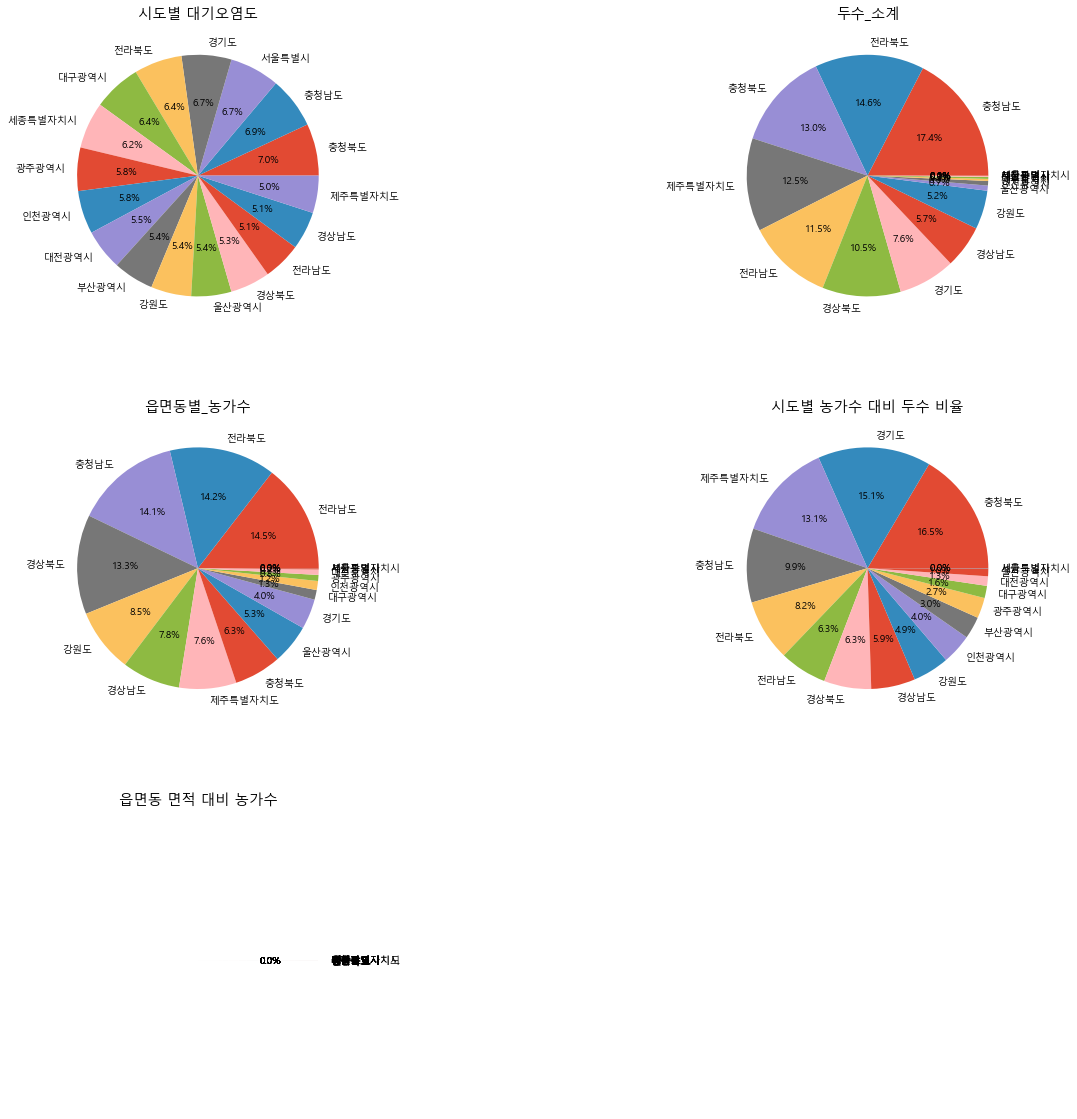

In [ ]:
plt.figure(figsize=[20,20])
plt.subplots_adjust(hspace=.3, wspace=.5)

plt.subplot(321)
plt.pie(df[['시도','시군별_대기오염도']].groupby(by='시도').mean().reset_index().sort_values(by='시군별_대기오염도', ascending=False)['시군별_대기오염도'],
       labels=df[['시도','시군별_대기오염도']].groupby(by='시도').mean().reset_index().sort_values(by='시군별_대기오염도', ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('시도별 대기오염도')

plt.subplot(322)
plt.pie(df[['시도','두수_소계']].groupby(by='시도').mean().fillna(0).reset_index().sort_values(by='두수_소계', ascending=False)['두수_소계'],
       labels=df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('두수_소계')

plt.subplot(323)
plt.pie(df[['시도','읍면동별_농가수']].groupby(by='시도').mean().fillna(0).reset_index().sort_values(by='읍면동별_농가수', ascending=False)['읍면동별_농가수'],
       labels=df[['시도','읍면동별_농가수']].groupby(by='시도').mean().reset_index().sort_values(by='읍면동별_농가수', ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('읍면동별_농가수')

plt.subplot(325)
plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('읍면동 면적 대비 농가수')

plt.subplot(324)
plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().fillna(0).sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('시도별 농가수 대비 두수 비율')

plt.show()

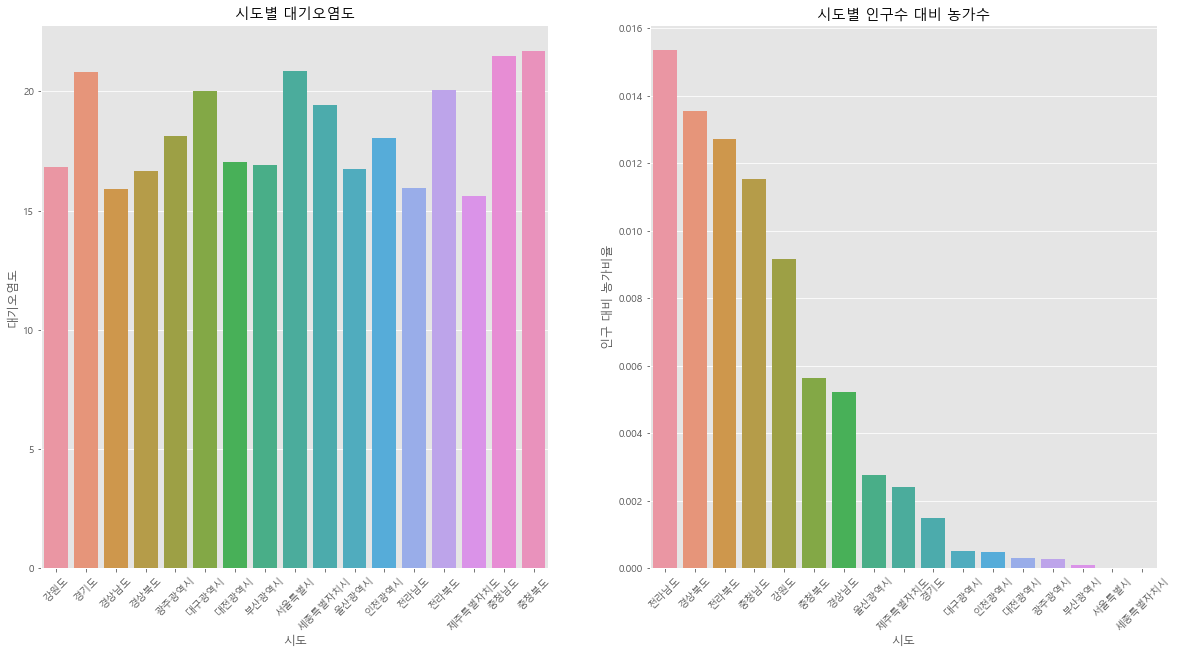

In [ ]:
plt.figure(figsize=[20,10])

plt.subplot(121)
sns.barplot(x='시도', y='시군별_대기오염도', data=df, ci=False)
plt.title('시도별 대기오염도')
plt.ylabel('대기오염도')
plt.xticks(rotation=45)

plt.subplot(122)
sns.barplot(x=pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_총거주자수']).reset_index().fillna(0).sort_values(by=0, ascending=False)['시도'],
       y=pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_총거주자수']).reset_index().sort_values(by=0, ascending=False)[0])
plt.title('시도별 인구수 대비 농가수')
plt.ylabel('인구 대비 농가비율')
plt.xticks(rotation=45)

plt.show()

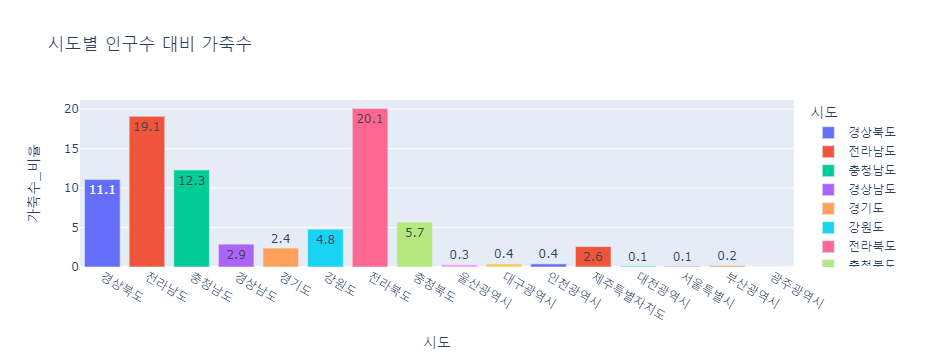

In [50]:
#시각화
#인구수 대비 가축 수 
df_시도 = df1.groupby('시도').sum().reset_index()
df_시도['가축수_비율'] = (df_시도['두수_소계'] / df_시도['읍면동_총거주자수']).round(1)
df_시도 = df_시도.sort_values('농가수', ascending=False)
fig = px.bar(df_시도, x='시도', y='가축수_비율', color = '시도', text='가축수_비율', title='시도별 인구수 대비 가축수')
fig.show(render = 'png')

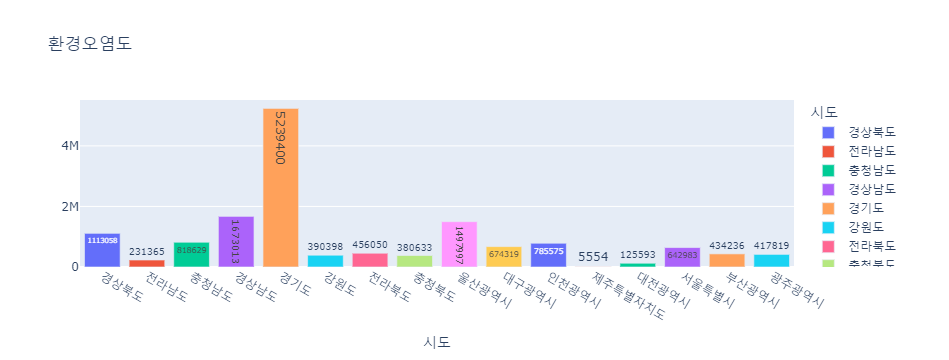

In [49]:
#환경오염지수 시각화
#df_시도['환경오염도_농가수비율'] = df_시도['환경오염도'] * df_시도['가축수_비율']
df_시도 = df_시도.sort_values('농가수', ascending=False).round(2)
fig = px.bar(df_시도, x='시도', y='환경오염도', color='시도', text='환경오염도', title='환경오염도', labels={'환경오염도':''})
fig.show(render = 'png')

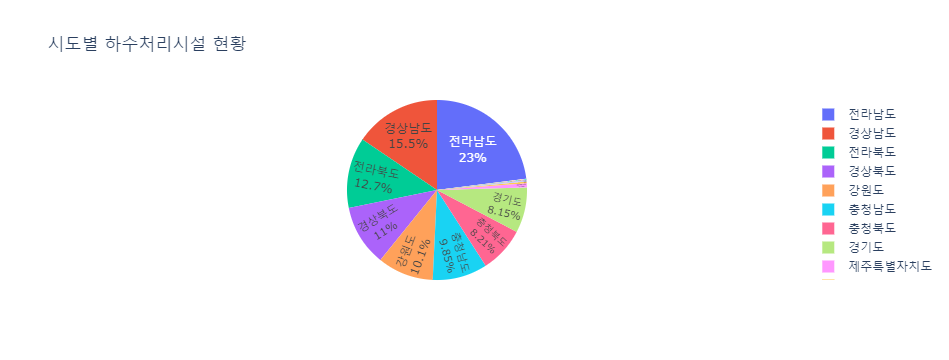

In [48]:
fig = px.pie(df_시도, values='하수처리시설_개수', names='시도', title='시도별 하수처리시설 현황', labels={'시도'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(render = 'png')

# 3. 상관분석

In [ ]:
df_cor = df.groupby(by=['시도','시군']).sum().corr()

C:\Users\Juns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Juns\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


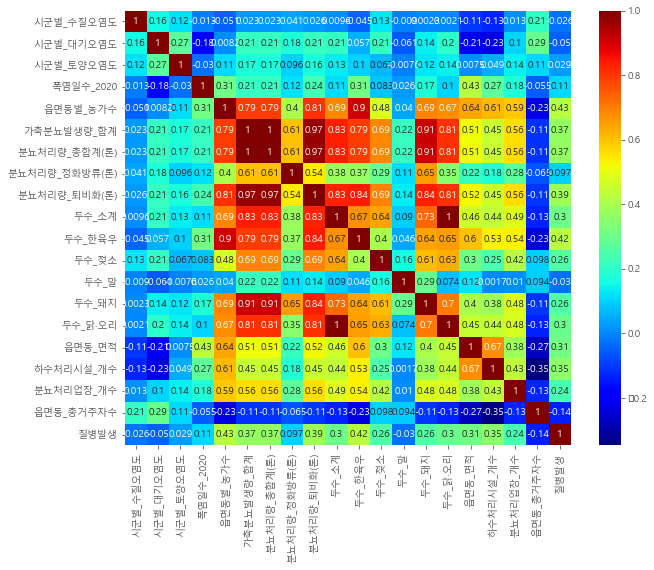

In [ ]:
plt.figure(figsize=[10,8])

sns.heatmap(df_cor, annot=True, cmap=plt.cm.jet)
plt.show()

In [ ]:
df_cor.iloc[:3,3:]

,폭염일수_2020,읍면동별_농가수,가축분뇨발생량_합계,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생
시군별_수질오염도,-0.013493,-0.051347,0.022855,0.022855,0.040577,0.026227,0.009580,-0.044909,0.127596,-0.008951,0.002292,0.002100,-0.109110,-0.126959,0.013037,0.207740,-0.025932
시군별_대기오염도,-0.177830,0.008152,0.212704,0.212704,0.178418,0.211703,0.205863,0.057123,0.205585,-0.061457,0.142189,0.198888,-0.211391,-0.228119,0.101407,0.292687,-0.050285
시군별_토양오염도,-0.030247,0.110732,0.171547,0.171547,0.096270,0.164915,0.134440,0.099837,0.066615,-0.007587,0.121310,0.139858,0.007536,0.048986,0.139529,0.108621,0.029145


# 4. 데이터 변환
## 4.1. 로그변환

In [ ]:
## 데이터 불러오기
df = pd.DataFrame(pd.read_excel('C:/Users/User/Desktop/data/최종_데이터셋/최종_0932.xlsx'))

In [ ]:
df.columns

Index(['시군코드', '시도', '시군', '폭염일수_2020', '가축분뇨발생량_합계', '분뇨처리_총합', '분뇨처리_정화',
       '분뇨처리_퇴비', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수', '질병발생',
       '시도별_가축더위지수', '강수량_2020', '가축사육종사자수', '두수_한우', '두수_돼지', '두수_닭_오리',
       '두수_말', '두수_소계', '농가수', '농가수_면적비', '가축분뇨발생량_합계_면적비', '읍면동_총거주자수_면적비',
       '두수_소계_면적비', '시군별_수질오염도', '시군별_대기오염도', '시군별_토양오염도'],
      dtype='object')

In [ ]:
## 수질오염도가 null인 행 제거
df = df[~df['시군별_수질오염도'].isnull()]

In [ ]:
## numerical 변수를 정규분포에 가깝게 통계적 변환
colums = df.columns[3:]

for i in colums:
    df[colums] = np.log1p(df[colums])

## 표준화
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df_num1 = pd.DataFrame(min_max.fit_transform(df_num))

col = df_num.columns.tolist()
df_num1.columns = col 
df_num1

In [ ]:
df_num = df[['폭염일수_2020', '분뇨처리_총합', '분뇨처리_정화',
       '분뇨처리_퇴비', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수', '질병발생',
       '시도별_가축더위지수', '강수량_2020', '가축사육종사자수', '두수_한우', '두수_돼지', '두수_닭_오리',
       '두수_말', '두수_소계', '농가수', '농가수_면적비', '가축분뇨발생량_합계_면적비', '읍면동_총거주자수_면적비', 
             '두수_소계_면적비', '시군별_수질오염도', '시군별_대기오염도', '시군별_토양오염도']]

In [ ]:
df_num.corr().iloc[0:22, 22:25].abs().mean()

시군별_수질오염도    0.180313
시군별_대기오염도    0.173794
시군별_토양오염도    0.167273
dtype: float64

## 4.2. 결측치 처리
- sklearn 내장모델 활용

In [ ]:
df_num_col = df_num.columns.tolist()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 10, random_state = 0)
df_num = pd.DataFrame(imputer.fit_transform(df_num))

df_num.columns = df_num_col
df_num

,폭염일수_2020,분뇨처리_총합,분뇨처리_정화,분뇨처리_퇴비,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생,시도별_가축더위지수,...,두수_말,두수_소계,농가수,농가수_면적비,가축분뇨발생량_합계_면적비,읍면동_총거주자수_면적비,두수_소계_면적비,시군별_수질오염도,시군별_대기오염도,시군별_토양오염도
0,2.525729,6.192005,4.493691,5.375902,20.764060,2.197225,0.000000,12.262647,0.000000,4.189655,...,3.931826,12.246197,6.431331,5.952161e-07,4.683247e-07,0.000203,0.000200,0.778177,2.726985,4.491721
1,2.197225,4.934630,1.298474,4.886120,20.310482,2.772589,0.000000,10.186597,1.386294,4.189655,...,2.397895,12.167046,5.697093,4.487723e-07,2.085532e-07,0.000040,0.000291,0.537662,2.657201,4.413671
2,0.000000,2.836883,0.000000,2.836883,19.028829,0.000000,0.000000,11.498238,0.000000,4.189655,...,0.000000,9.639457,5.673323,1.578636e-06,8.743746e-08,0.000536,0.000084,0.662688,2.848643,4.463492
3,1.945354,5.333728,0.000000,5.327279,20.896708,3.044522,0.000000,11.049286,0.000000,4.189655,...,3.258097,9.945445,6.335054,4.733510e-07,1.733735e-07,0.000053,0.000018,0.856116,2.634081,5.439228
4,1.945650,5.577816,0.000000,5.487089,20.542843,3.761200,0.000000,10.401167,0.693147,4.189655,...,0.000000,11.195100,5.958425,4.623212e-07,3.155922e-07,0.000039,0.000087,1.299374,2.886285,4.880527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.961523,6.083281,0.000000,5.937111,19.815463,1.098612,0.000000,12.149195,0.693147,4.169246,...,0.000000,0.000000,0.000000,0.000000e+00,1.084419e-06,0.000468,0.000000,0.851005,2.980002,4.671894
201,1.961891,4.990639,0.000000,4.967599,18.674137,0.693147,0.000000,12.302618,1.791759,4.169246,...,0.000000,0.000000,0.000000,0.000000e+00,1.133361e-06,0.001708,0.000000,0.814036,3.147190,4.671894
202,1.961979,6.863882,0.000000,6.581999,19.185388,0.693147,0.693147,12.173146,1.609438,4.169246,...,0.000000,0.000000,0.000000,0.000000e+00,4.450234e-06,0.000900,0.000000,1.000632,3.180817,4.671894
203,2.833213,6.003524,0.000000,5.832926,19.083799,1.609438,0.000000,12.485634,0.000000,4.169246,...,0.000000,0.000000,0.000000,0.000000e+00,2.080819e-06,0.001362,0.000000,1.151268,3.232315,4.671894


## 4.3. 표준화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df_num1 = pd.DataFrame(min_max.fit_transform(df_num))

col = df_num.columns.tolist()
df_num1.columns = col 
df_num1

,폭염일수_2020,분뇨처리_총합,분뇨처리_정화,분뇨처리_퇴비,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생,시도별_가축더위지수,...,두수_말,두수_소계,농가수,농가수_면적비,가축분뇨발생량_합계_면적비,읍면동_총거주자수_면적비,두수_소계_면적비,시군별_수질오염도,시군별_대기오염도,시군별_토양오염도
0,0.728771,0.737984,0.647682,0.661564,0.872753,0.520730,0.000000,0.574057,0.000000,0.553841,...,0.431014,0.760597,0.817776,0.131393,0.058740,0.007185,0.008613,0.359676,0.276697,0.324743
1,0.633985,0.588126,0.187151,0.601291,0.785744,0.657088,0.000000,0.029032,0.349167,0.553841,...,0.262862,0.755681,0.724414,0.099066,0.026158,0.000759,0.012525,0.248509,0.183465,0.296539
2,0.000000,0.338109,0.000000,0.349110,0.539888,0.000000,0.000000,0.373377,0.000000,0.553841,...,0.000000,0.598695,0.721391,0.348482,0.010967,0.020313,0.003603,0.306296,0.439234,0.314542
3,0.561311,0.635692,0.000000,0.655580,0.898198,0.721535,0.000000,0.255513,0.000000,0.553841,...,0.357158,0.617700,0.805534,0.104492,0.021746,0.001263,0.000756,0.395699,0.152576,0.667128
4,0.561396,0.664783,0.000000,0.675247,0.830317,0.891384,0.000000,0.085363,0.174583,0.553841,...,0.000000,0.695314,0.757643,0.102057,0.039584,0.000732,0.003757,0.600574,0.489524,0.465239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.565976,0.725026,0.000000,0.730627,0.690786,0.260365,0.000000,0.544272,0.174583,0.323955,...,0.000000,0.000000,0.000000,0.000000,0.136015,0.017632,0.000000,0.393337,0.614731,0.389849
201,0.566082,0.594801,0.000000,0.611318,0.471848,0.164272,0.000000,0.584550,0.451292,0.323955,...,0.000000,0.000000,0.000000,0.000000,0.142153,0.066493,0.000000,0.376250,0.838097,0.389849
202,0.566108,0.818061,0.000000,0.809987,0.569920,0.164272,0.333333,0.550560,0.405370,0.323955,...,0.000000,0.000000,0.000000,0.000000,0.558176,0.034662,0.000000,0.462495,0.883024,0.389849
203,0.817493,0.715520,0.000000,0.717806,0.550432,0.381428,0.000000,0.632597,0.000000,0.323955,...,0.000000,0.000000,0.000000,0.000000,0.260989,0.052851,0.000000,0.532119,0.951825,0.389849


In [ ]:
df_num1['sum'] = df_num1['시군별_토양오염도'] + df_num1['시군별_대기오염도'] + df_num1['시군별_수질오염도'] 
df_num1

,폭염일수_2020,분뇨처리_총합,분뇨처리_정화,분뇨처리_퇴비,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생,시도별_가축더위지수,...,두수_소계,농가수,농가수_면적비,가축분뇨발생량_합계_면적비,읍면동_총거주자수_면적비,두수_소계_면적비,시군별_수질오염도,시군별_대기오염도,시군별_토양오염도,sum
0,0.728771,0.737984,0.647682,0.661564,0.872753,0.520730,0.000000,0.574057,0.000000,0.553841,...,0.760597,0.817776,0.131393,0.058740,0.007185,0.008613,0.359676,0.276697,0.324743,0.961116
1,0.633985,0.588126,0.187151,0.601291,0.785744,0.657088,0.000000,0.029032,0.349167,0.553841,...,0.755681,0.724414,0.099066,0.026158,0.000759,0.012525,0.248509,0.183465,0.296539,0.728513
2,0.000000,0.338109,0.000000,0.349110,0.539888,0.000000,0.000000,0.373377,0.000000,0.553841,...,0.598695,0.721391,0.348482,0.010967,0.020313,0.003603,0.306296,0.439234,0.314542,1.060072
3,0.561311,0.635692,0.000000,0.655580,0.898198,0.721535,0.000000,0.255513,0.000000,0.553841,...,0.617700,0.805534,0.104492,0.021746,0.001263,0.000756,0.395699,0.152576,0.667128,1.215403
4,0.561396,0.664783,0.000000,0.675247,0.830317,0.891384,0.000000,0.085363,0.174583,0.553841,...,0.695314,0.757643,0.102057,0.039584,0.000732,0.003757,0.600574,0.489524,0.465239,1.555337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.565976,0.725026,0.000000,0.730627,0.690786,0.260365,0.000000,0.544272,0.174583,0.323955,...,0.000000,0.000000,0.000000,0.136015,0.017632,0.000000,0.393337,0.614731,0.389849,1.397917
201,0.566082,0.594801,0.000000,0.611318,0.471848,0.164272,0.000000,0.584550,0.451292,0.323955,...,0.000000,0.000000,0.000000,0.142153,0.066493,0.000000,0.376250,0.838097,0.389849,1.604196
202,0.566108,0.818061,0.000000,0.809987,0.569920,0.164272,0.333333,0.550560,0.405370,0.323955,...,0.000000,0.000000,0.000000,0.558176,0.034662,0.000000,0.462495,0.883024,0.389849,1.735367
203,0.817493,0.715520,0.000000,0.717806,0.550432,0.381428,0.000000,0.632597,0.000000,0.323955,...,0.000000,0.000000,0.000000,0.260989,0.052851,0.000000,0.532119,0.951825,0.389849,1.873792


In [ ]:
df_종속 = df_num1[['시군별_대기오염도', '시군별_토양오염도', '시군별_수질오염도','sum']]
df_num1 = df_num1.drop(columns=['시군별_대기오염도', '시군별_토양오염도', '시군별_수질오염도', 'sum', '농가수'])

##  4.4. 변수 선택

In [ ]:
import statsmodels.api as sm
variables = df_num1.columns.tolist() ## 설명 변수 리스트
 
y = df_종속['sum'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df_num1[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df_num1[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_num1[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['시도별_가축더위지수',
 '읍면동_총거주자수',
 '가축분뇨발생량_합계_면적비',
 '가축사육종사자수',
 '분뇨처리업장_개수',
 '분뇨처리_정화']

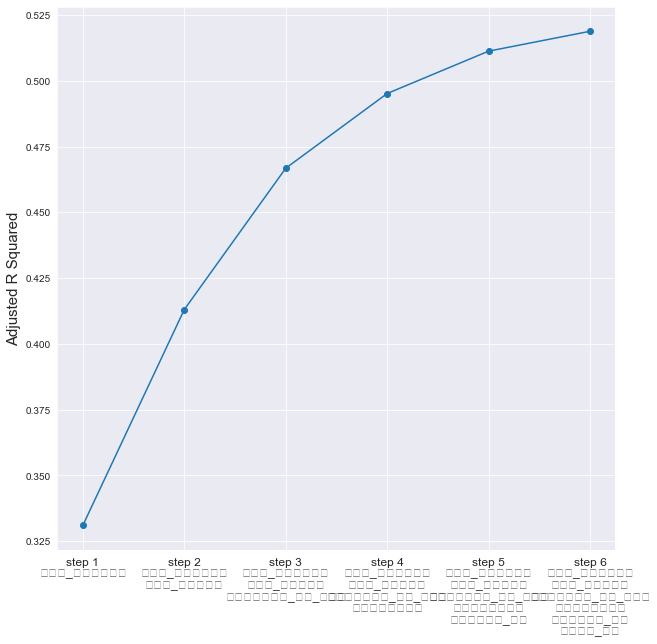

In [ ]:
# step별 결정계수 변화 확인
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
model = sm.OLS(y, sm.add_constant(pd.DataFrame(df_num[selected_variables]))).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sum   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     37.66
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           2.69e-30
Time:                        17:51:43   Log-Likelihood:                -33.389
No. Observations:                 205   AIC:                             80.78
Df Residuals:                     198   BIC:                             104.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             31.9591      4.957      6.447      0.000      22.184      41.734
시도별_가축더위지수        -7.6110      1.172     -6.494      0.000      -9.922      -5.300
읍면동_총거주자수          0.1391      0.025      5.528      0.000       0.090       0.189
가축분뇨발생량_합계_면적비  8.569e+04   2.08e+04      4.129      0.000    4.48e+04    1.27e+05
가축사육종사자수          -0.0834      0.019     -4.381      0.000      -0.121      -0.046
분뇨처리업장_개수          0.1123      0.041      2.751      0.006       0.032       0.193
분뇨처리_정화            0.0240      0.012      2.031      0.044       0.001       0.047
==============================================================================
Omnibus:                        1.863   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.579
Skew:                          -0.065   Prob(JB):                        0.454
Kurtosis:                       2.590   Cond. No.                     1.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5. 지수산출
- 회귀계수를 가중치로 활용

In [ ]:
new = df_num1[['시도별_가축더위지수', '읍면동_총거주자수', '가축분뇨발생량_합계_면적비', 
               '가축사육종사자수', '분뇨처리업장_개수', '분뇨처리_정화']]

In [ ]:
new['index'] = new['시도별_가축더위지수'] * (-7.6110) + new['읍면동_총거주자수'] * 0.1391 + new['가축분뇨발생량_합계_면적비'] * 8.569e+04 + new['가축사육종사자수'] * (-0.0834) + new['분뇨처리업장_개수'] * 0.1123 + new['분뇨처리_정화'] * 0.0240
new.head(2)

,시도별_가축더위지수,읍면동_총거주자수,가축분뇨발생량_합계_면적비,가축사육종사자수,분뇨처리업장_개수,분뇨처리_정화,index
0,0.553841,0.574057,0.058740,0.721357,0.0,0.647682,5029.271643
1,0.553841,0.029032,0.026158,0.636634,0.0,0.187151,2237.224690


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시도별_가축더위지수      205 non-null    float64
 1   읍면동_총거주자수       205 non-null    float64
 2   가축분뇨발생량_합계_면적비  205 non-null    float64
 3   가축사육종사자수        205 non-null    float64
 4   분뇨처리업장_개수       205 non-null    float64
 5   분뇨처리_정화         205 non-null    float64
 6   index           205 non-null    float64
dtypes: float64(7)
memory usage: 11.3 KB
